In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz  
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr  
!make 
!make install  
!pip install Ta-Lib

In [ ]:
# Numpy のアップグレード
!pip install numpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


ランタイムを再起動してください

In [ ]:
# 環境変数を設定
!echo 'export LD_LIBRARY_PATH=/usr/lib' >> ~/.bashrc
!source ~/.bashrc

In [ ]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

In [ ]:
import mplfinance as mpf
import datetime as dt
import talib as ta

<ipython-input-5-337a0c78f95b>:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles


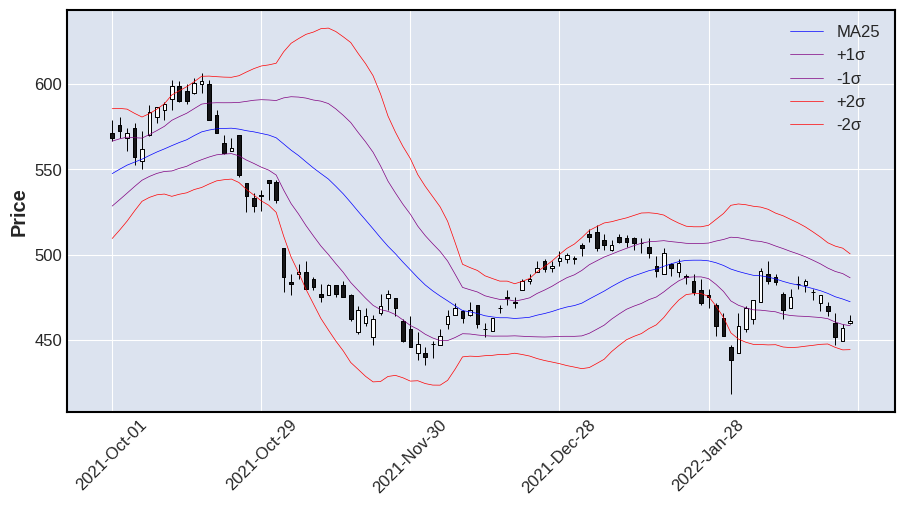

In [ ]:
df = get_stock_data(4902)   # コニカミノルタ
close = df["Close"]

# 25日移動平均線
df["ma25"]  = ta.SMA(close, 25)

# ボリンジャーバンド　±1σ　±2σ
df["upper1"], _, df["lower1"] = ta.BBANDS(close, timeperiod=25, nbdevup=1, nbdevdn=1, matype=ta.MA_Type.SMA)
df["upper2"], _, df["lower2"] = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)

# 2021.10.1から2022.2.28までのチャートを作成
cdf = df[dt.datetime(2021,10,1):dt.datetime(2022,2,28)]
apd  = { 
          # 25日移動平均線
          "MA25": mpf.make_addplot(cdf["ma25"], color="blue", width=0.5),
          # +1σ
          "+1σ": mpf.make_addplot(cdf["upper1"], color="purple", width=0.5),
          # -1σ
          "-1σ": mpf.make_addplot(cdf["lower1"], color="purple", width=0.5),
          # +2σ
          "+2σ": mpf.make_addplot(cdf["upper2"], color="red", width=0.5),
          # -2σ
          "-2σ": mpf.make_addplot(cdf["lower2"], color="red", width=0.5)
        }

# ラベルをつけてチャートを表示
fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=list(apd.values()), returnfig=True)
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(apd.keys()))
fig.show()

<ipython-input-6-10e95be361e6>:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles


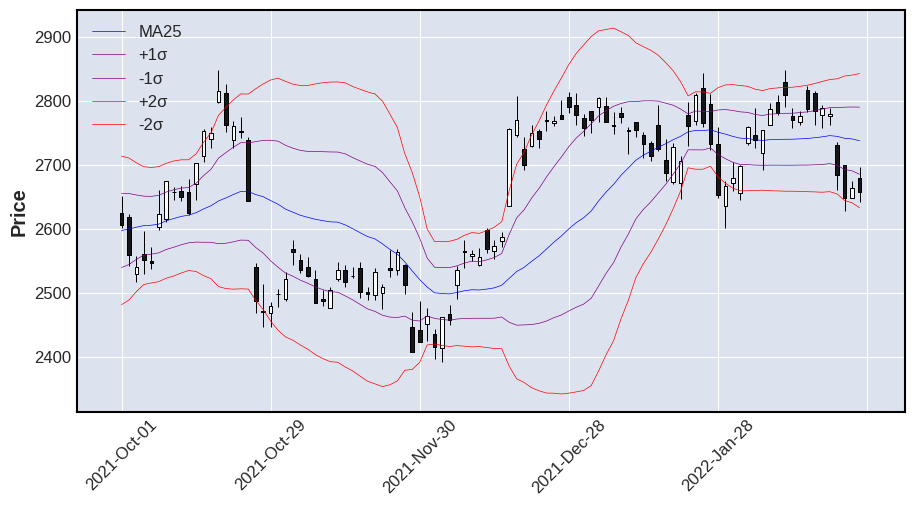

In [ ]:
df = get_stock_data(7751)   # キャノン
close = df["Close"]

# 25日移動平均線
df["ma25"]  = ta.SMA(close, 25)

# ボリンジャーバンド　±1σ　±2σ
df["upper1"], _, df["lower1"] = ta.BBANDS(close, timeperiod=25, nbdevup=1, nbdevdn=1, matype=ta.MA_Type.SMA)
df["upper2"], _, df["lower2"] = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)

# 2021.10.1から2022.2.28までのチャートを作成
cdf = df[dt.datetime(2021,10,1):dt.datetime(2022,2,28)]
apd  = { "MA25": mpf.make_addplot(cdf["ma25"], color="blue", width=0.5), 
          "+1σ": mpf.make_addplot(cdf["upper1"], color="purple", width=0.5),
          "-1σ": mpf.make_addplot(cdf["lower1"], color="purple", width=0.5),
          "+2σ": mpf.make_addplot(cdf["upper2"], color="red", width=0.5),
          "-2σ": mpf.make_addplot(cdf["lower2"], color="red", width=0.5)}

# ラベルをつけてチャートを表示
fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=list(apd.values()), returnfig=True)
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(apd.keys()))
fig.show()

<ipython-input-7-2070397d00ad>:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles


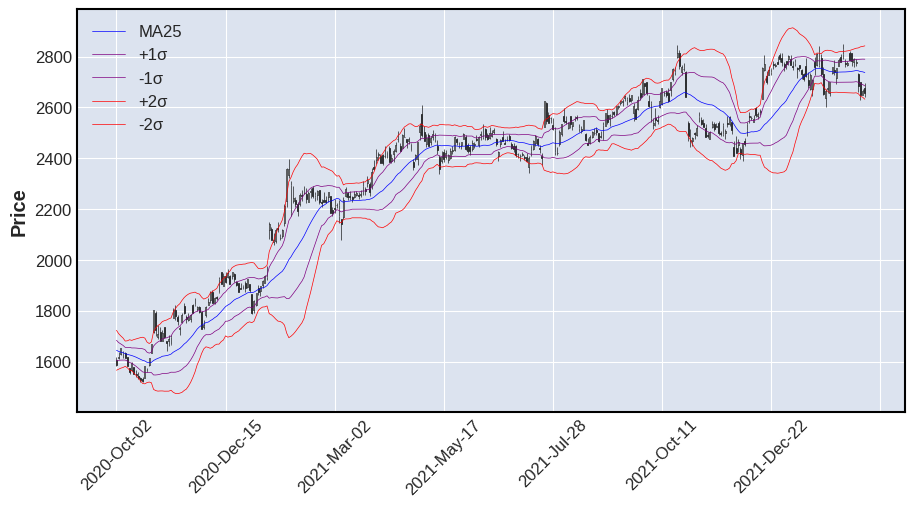

In [ ]:
df = get_stock_data(7751)   # キャノン
close = df["Close"]

# 25日移動平均線
df["ma25"]  = ta.SMA(close, 25)

# ボリンジャーバンド　±1σ　±2σ
df["upper1"], _, df["lower1"] = ta.BBANDS(close, timeperiod=25, nbdevup=1, nbdevdn=1, matype=ta.MA_Type.SMA)
df["upper2"], _, df["lower2"] = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)

# 2021.10.1から2022.2.28までのチャートを作成
cdf = df[dt.datetime(2020,10,1):dt.datetime(2022,2,28)]
apd  = { "MA25": mpf.make_addplot(cdf["ma25"], color="blue", width=0.5), 
          "+1σ": mpf.make_addplot(cdf["upper1"], color="purple", width=0.5),
          "-1σ": mpf.make_addplot(cdf["lower1"], color="purple", width=0.5),
          "+2σ": mpf.make_addplot(cdf["upper2"], color="red", width=0.5),
          "-2σ": mpf.make_addplot(cdf["lower2"], color="red", width=0.5)}

# ラベルをつけてチャートを表示
fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=list(apd.values()), returnfig=True)
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(apd.keys()))
fig.show()

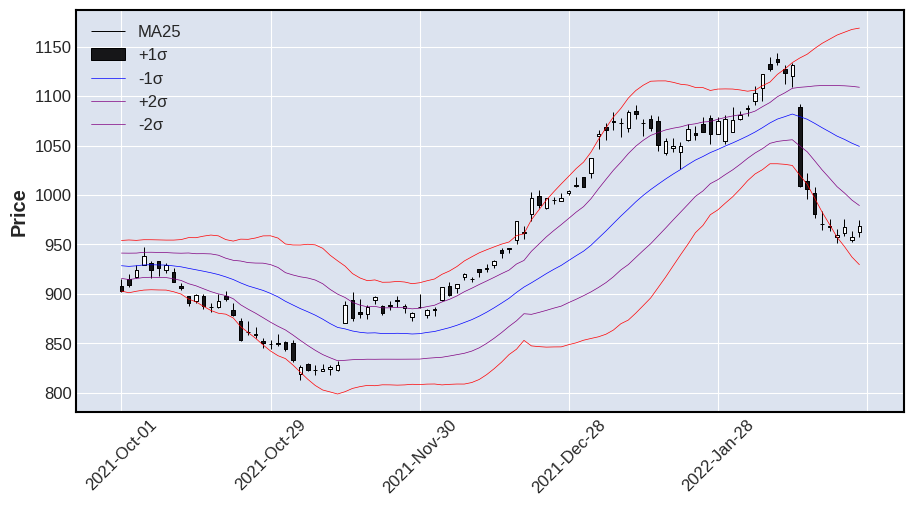

In [ ]:
df = get_stock_data(7182)   # ゆうちょ銀行
close = df["Close"]

# 25日移動平均線
df["ma25"]  = ta.SMA(close, 25)

# ボリンジャーバンド　±1σ　±2σ
df["upper1"], _, df["lower1"] = ta.BBANDS(close, timeperiod=25, nbdevup=1, nbdevdn=1, matype=ta.MA_Type.SMA)
df["upper2"], _, df["lower2"] = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)

# 2021.10.1から2022.2.28までのチャートを作成
cdf = df[dt.datetime(2021,10,1):dt.datetime(2022,2,28)]
apd  = [ 
          mpf.make_addplot(cdf["ma25"], color="blue", width=0.5),      # 25日移動平均線
          mpf.make_addplot(cdf["upper1"], color="purple", width=0.5),  # +1σ
          mpf.make_addplot(cdf["lower1"], color="purple", width=0.5),  # -1σ
          mpf.make_addplot(cdf["upper2"], color="red", width=0.5),     # +2σ
          mpf.make_addplot(cdf["lower2"], color="red", width=0.5)      # -2σ
        ]

# ラベルをつけてチャートを表示
fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=apd, returnfig=True)
axes[0].legend(["MA25", "+1σ", "-1σ", "+2σ", "-2σ"])
fig.show()

<ipython-input-9-f57b3f0c43ae>:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles


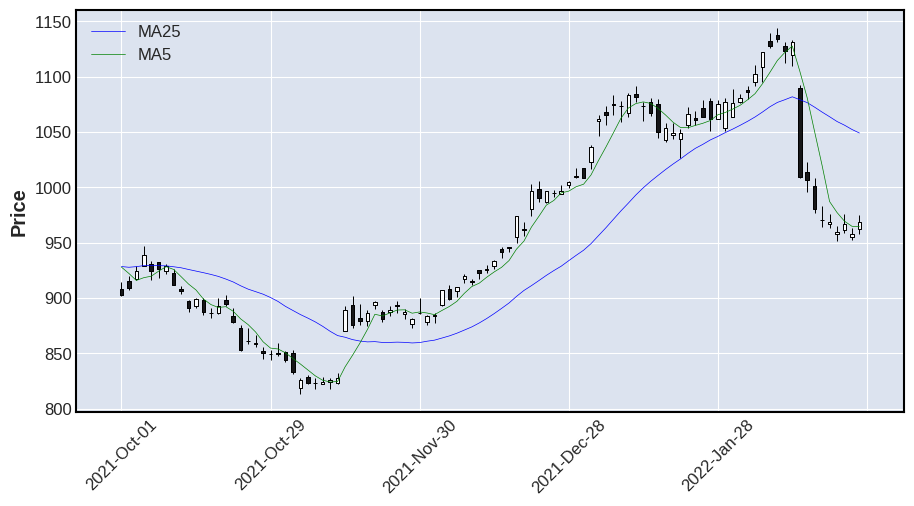

In [ ]:
df = get_stock_data(7182)   # ゆうちょ銀行
close = df["Close"]

# 25日移動平均線
df["ma25"]  = close.rolling(window=25).mean()
df["ma5"]  = close.rolling(window=5).mean()

# ボリンジャーバンド　±1σ　±2σ
df["upper1"], _, df["lower1"] = ta.BBANDS(close, timeperiod=25, nbdevup=1, nbdevdn=1, matype=ta.MA_Type.SMA)
df["upper2"], _, df["lower2"] = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)

# 2021.10.1から2022.2.28までのチャートを作成
cdf = df[dt.datetime(2021,10,1):dt.datetime(2022,2,28)]
apd  = { "MA25": mpf.make_addplot(cdf["ma25"], color="blue", width=0.5), 
          "MA5": mpf.make_addplot(cdf["ma5"], color="green", width=0.5)}

# ラベルをつけてチャートを表示
fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=list(apd.values()), returnfig=True)
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(apd.keys()))
fig.show()

<ipython-input-11-6accd98c5b62>:28: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles


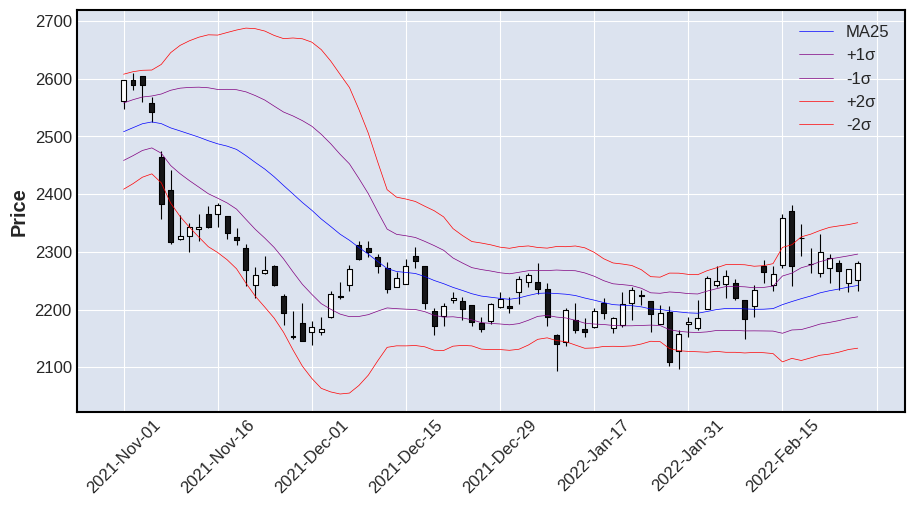

In [ ]:
df = get_stock_data(9783)   # ベネッセホールディングス
close = df["Close"]

# 25日移動平均線
df["ma25"]  = close.rolling(window=25).mean()

# ボリンジャーバンド　±1σ　±2σ
df["upper1"], _, df["lower1"] = ta.BBANDS(close, timeperiod=25, nbdevup=1, nbdevdn=1, matype=ta.MA_Type.SMA)
df["upper2"], _, df["lower2"] = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)

# 2021.11.1から2022.2.28までのチャートを作成
cdf = df[dt.datetime(2021,11,1):dt.datetime(2022,2,28)]
apd  = {
          "MA25": mpf.make_addplot(cdf["ma25"], color="blue", width=0.5),      # MA25
          "+1σ": mpf.make_addplot(cdf["upper1"], color="purple", width=0.5),  # +1σ
          "-1σ": mpf.make_addplot(cdf["lower1"], color="purple", width=0.5),  # -1σ
          "+2σ": mpf.make_addplot(cdf["upper2"], color="red", width=0.5),     # +2σ
          "-2σ": mpf.make_addplot(cdf["lower2"], color="red", width=0.5)      # -2σ
        }

# ラベルをつけてチャートを表示
#fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=apd, returnfig=True)
#axes[0].legend(["MA25", "+1σ", "-1σ", "+2σ", "-2σ"])
#fig.show()

fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=list(apd.values()), returnfig=True)
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(apd.keys()))
fig.show()